# **Part 1 continue from other pdf(wrote on paper)**

Question number 12(a) with x0 =(0,-1)

<ipython-input-19-6e5b446e66b1>:65: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour(X1, X2, Z, levels=np.logspace(-1, 3, 30), cmap='viridis', label='Original Function')
<ipython-input-19-6e5b446e66b1>:66: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour(X1, X2, Z_quadratic, levels=np.logspace(-1, 3, 30), cmap='inferno', linestyles='dotted', label='Quadratic Approximation')


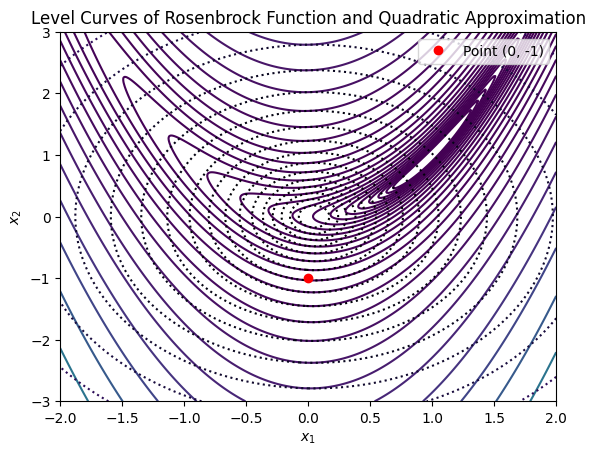

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#   the original Rosenbrock function
def rosenbrock(x):
    x1, x2 = x[0], x[1]
    return 10 * (x2 - x1 ** 2) ** 2 + (1 - x1) ** 2

#   the gradient of the Rosenbrock function
def gradient_rosenbrock(x):
    x1, x2 = x
    df_dx1 = -40 * x1 * (x2 - x1 ** 2) - 2 * (1 - x1)
    df_dx2 = 20 * (x2 - x1 ** 2)
    return np.array([df_dx1, df_dx2])

#   the Hessian matrix of the Rosenbrock function
def hessian_rosenbrock(x):
    x1, x2 = x
    d2f_dx1dx1 = 120 * x1 ** 2 - 40 * x2 + 2
    d2f_dx2dx2 = 20
    d2f_dx1dx2 = -40 * x1
    return np.array([[d2f_dx1dx1, d2f_dx1dx2], [d2f_dx1dx2, d2f_dx2dx2]])

#   the quadratic approximation of the Rosenbrock function
def quadratic_approximation(x, x0):
    grad_x0 = gradient_rosenbrock(x0)
    hessian_x0 = hessian_rosenbrock(x0)
    d = x - x0
    return rosenbrock(x0) + np.dot(grad_x0, d) + 0.5 * np.dot(d, np.dot(hessian_x0, d))


#   the conjugate gradient method for quadratic minimization
def conjugate_gradient(gradient, hessian, delta, x0, tol=1e-6, max_iter=100):
    x = x0
    r = -gradient
    p = r
    k = 0

    while k < max_iter and np.linalg.norm(r) > tol:
        Ap = np.dot(hessian, p)
        alpha = np.dot(r, r) / np.dot(p, Ap)
        x = x + alpha * p
        r_new = r - alpha * Ap
        beta = np.dot(r_new, r_new) / np.dot(r, r)
        p = r_new + beta * p
        r = r_new
        k += 1

    return x

# Create a grid of points for the plot
x1 = np.linspace(-2, 2, 400)
x2 = np.linspace(-3, 3, 400)
X1, X2 = np.meshgrid(x1, x2)
Z = rosenbrock([X1, X2])
Z_quadratic = np.zeros_like(X1)

x0 = np.array([0, -1])  # Point (0, 0.5)

for i in range(X1.shape[0]):
    for j in range(X1.shape[1]):
        Z_quadratic[i, j] = quadratic_approximation(np.array([X1[i, j], X2[i, j]]), x0)

# Plot the level curves
plt.contour(X1, X2, Z, levels=np.logspace(-1, 3, 30), cmap='viridis', label='Original Function')
plt.contour(X1, X2, Z_quadratic, levels=np.logspace(-1, 3, 30), cmap='inferno', linestyles='dotted', label='Quadratic Approximation')

# Plot the point (0, -1)
plt.plot(0, -1, 'ro', label='Point (0, -1)')

plt.title('Level Curves of Rosenbrock Function and Quadratic Approximation')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.legend()
plt.show()


Question number 12(b) with x0 =(0,-1)

In [54]:
import numpy as np

#   the Rosenbrock function
def rosenbrock(x):
    x1, x2 = x
    return 10 * (x2 - x1**2)**2 + (1 - x1)**2

#   the gradient of the Rosenbrock function
def gradient_rosenbrock(x):
    x1, x2 = x
    df_dx1 = -40 * x1 * (x2 - x1**2) - 2 * (1 - x1)
    df_dx2 = 20 * (x2 - x1**2)
    return np.array([df_dx1, df_dx2])

#   the Hessian matrix of the Rosenbrock function
def hessian_rosenbrock(x):
    x1, x2 = x
    d2f_dx1dx1 = 120 * x1**2 - 40 * x2 + 2
    d2f_dx2dx2 = 20
    d2f_dx1dx2 = -40 * x1
    return np.array([[d2f_dx1dx1, d2f_dx1dx2], [d2f_dx1dx2, d2f_dx2dx2]])

#   the quadratic approximation of the Rosenbrock function
def quadratic_approximation(x, grad, hessian):
    return rosenbrock(x) + np.dot(grad, x) + 0.5 * np.dot(x, np.dot(hessian, x))


lami = 0
x0 = np.array([0, -1])
g0 = gradient_rosenbrock(x0)
H0 = hessian_rosenbrock(x0)
eigenvalues, eigenvectors = np.linalg.eigh(H0)
sorted_indices = np.argsort(eigenvalues)
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]
L = np.linalg.qr(eigenvectors)[0]
delta1 = 0.25
delta2 = 0.75
delta3 = 1.25

I = np.identity(H0.shape[0])
Hlam = H0 + lami * I
dlam = -np.linalg.inv(Hlam).dot(g0)
norm_dlam = np.linalg.norm(dlam)
w = np.linalg.solve(L, dlam)
wn = w@w
#print(norm_dlam)
#print(0.75 * delta1 <= norm_dlam or norm_dlam >= 1.5 * delta1)
#print(0.75 * delta2 <= norm_dlam or norm_dlam >= 1.5 * delta2)
#print(0.75 * delta3 <= norm_dlam or norm_dlam >= 1.5 * delta3)
#for delta1,delta2,delta3 its between range  so we just need 1st iteration

print("for radius = 0.25 dlambda =", dlam, "norm of dlambda =", norm_dlam)
print("for radius = 0.75 dlambda =", dlam, "norm of dlambda =", norm_dlam)
print("for radius = 1.25 dlambda =", dlam, "norm of dlambda =", norm_dlam)




0.3348441931192785
for radius = 0.25 dlambda = [0.04761905 1.        ] norm of dlambda = 1.001133144839459
for radius = 0.75 dlambda = [0.04761905 1.        ] norm of dlambda = 1.001133144839459
for radius = 1.25 dlambda = [0.04761905 1.        ] norm of dlambda = 1.001133144839459


Question number 12(a) with x0 =(0,0.5)

<ipython-input-33-67a2ef075832>:65: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour(X1, X2, Z, levels=np.logspace(-1, 3, 30), cmap='viridis', label='Original Function')
<ipython-input-33-67a2ef075832>:66: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour(X1, X2, Z_quadratic, levels=np.logspace(-1, 3, 30), cmap='inferno', linestyles='dotted', label='Quadratic Approximation')


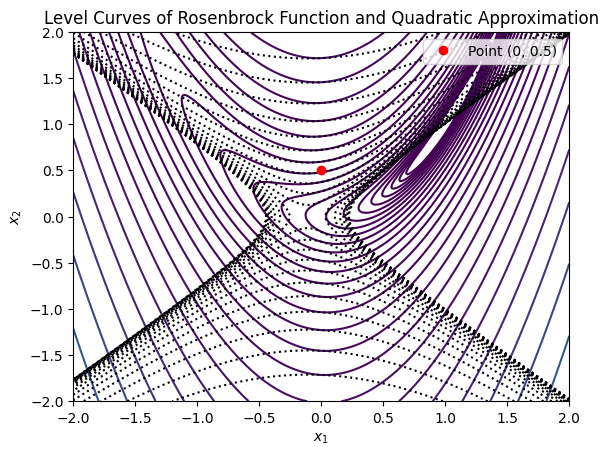

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# the original Rosenbrock function
def rosenbrock(x):
    x1, x2 = x[0], x[1]
    return 10 * (x2 - x1 ** 2) ** 2 + (1 - x1) ** 2

# the gradient of the Rosenbrock function
def gradient_rosenbrock(x):
    x1, x2 = x
    df_dx1 = -40 * x1 * (x2 - x1 ** 2) - 2 * (1 - x1)
    df_dx2 = 20 * (x2 - x1 ** 2)
    return np.array([df_dx1, df_dx2])

# the Hessian matrix of the Rosenbrock function
def hessian_rosenbrock(x):
    x1, x2 = x
    d2f_dx1dx1 = 120 * x1 ** 2 - 40 * x2 + 2
    d2f_dx2dx2 = 20
    d2f_dx1dx2 = -40 * x1
    return np.array([[d2f_dx1dx1, d2f_dx1dx2], [d2f_dx1dx2, d2f_dx2dx2]])

#   the quadratic approximation of the Rosenbrock function
def quadratic_approximation(x, x0):
    grad_x0 = gradient_rosenbrock(x0)
    hessian_x0 = hessian_rosenbrock(x0)
    d = x - x0
    return rosenbrock(x0) + np.dot(grad_x0, d) + 0.5 * np.dot(d, np.dot(hessian_x0, d))


#   the conjugate gradient method for quadratic minimization
def conjugate_gradient(gradient, hessian, delta, x0, tol=1e-6, max_iter=100):
    x = x0
    r = -gradient
    p = r
    k = 0

    while k < max_iter and np.linalg.norm(r) > tol:
        Ap = np.dot(hessian, p)
        alpha = np.dot(r, r) / np.dot(p, Ap)
        x = x + alpha * p
        r_new = r - alpha * Ap
        beta = np.dot(r_new, r_new) / np.dot(r, r)
        p = r_new + beta * p
        r = r_new
        k += 1

    return x

# Create a grid of points for the plot
x1 = np.linspace(-2, 2, 400)
x2 = np.linspace(-2, 2, 400)
X1, X2 = np.meshgrid(x1, x2)
Z = rosenbrock([X1, X2])
Z_quadratic = np.zeros_like(X1)

x0 = np.array([0, 0.5])  # Point (0, 0.5)

for i in range(X1.shape[0]):
    for j in range(X1.shape[1]):
        Z_quadratic[i, j] = quadratic_approximation(np.array([X1[i, j], X2[i, j]]), x0)

# Plot the level curves
plt.contour(X1, X2, Z, levels=np.logspace(-1, 3, 30), cmap='viridis', label='Original Function')
plt.contour(X1, X2, Z_quadratic, levels=np.logspace(-1, 3, 30), cmap='inferno', linestyles='dotted', label='Quadratic Approximation')

# Plot the point (0, -1)
plt.plot(0, 0.5, 'ro', label='Point (0, 0.5)')

plt.title('Level Curves of Rosenbrock Function and Quadratic Approximation')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.legend()
plt.show()


Question number 12(b) with x0 =(0,0.5)

In [86]:
import numpy as np

#   the Rosenbrock function
def rosenbrock(x):
    x1, x2 = x
    return 10 * (x2 - x1**2)**2 + (1 - x1)**2

#   the gradient of the Rosenbrock function
def gradient_rosenbrock(x):
    x1, x2 = x
    df_dx1 = -40 * x1 * (x2 - x1**2) - 2 * (1 - x1)
    df_dx2 = 20 * (x2 - x1**2)
    return np.array([df_dx1, df_dx2])

#   the Hessian matrix of the Rosenbrock function
def hessian_rosenbrock(x):
    x1, x2 = x
    d2f_dx1dx1 = 120 * x1**2 - 40 * x2 + 2
    d2f_dx2dx2 = 20
    d2f_dx1dx2 = -40 * x1
    return np.array([[d2f_dx1dx1, d2f_dx1dx2], [d2f_dx1dx2, d2f_dx2dx2]])

#   the quadratic approximation of the Rosenbrock function
def quadratic_approximation(x, grad, hessian):
    return rosenbrock(x) + np.dot(grad, x) + 0.5 * np.dot(x, np.dot(hessian, x))

x0 = np.array([0, 0.5])

# range of delta1 values
delta1_values = [0.25, 0.75, 1.25]

for delta1 in delta1_values:
    lami = 0
    g0 = gradient_rosenbrock(x0)
    H0 = hessian_rosenbrock(x0)
    eigenvalues, eigenvectors = np.linalg.eigh(H0)
    sorted_indices = np.argsort(eigenvalues)
    eigenvalues = eigenvalues[sorted_indices]
    eigenvectors = eigenvectors[:, sorted_indices]
    L = np.linalg.qr(eigenvectors)[0]

    max_iterations = 100

    # Loop for updating lambda
    for iteration in range(max_iterations):
        I = np.identity(H0.shape[0])
        Hlam = H0 + lami * I
        dlam = -np.linalg.inv(Hlam).dot(g0)
        norm_dlam = np.linalg.norm(dlam)
        wn = np.dot(dlam, dlam)
    # condition for
        if 0.75 * delta1 <= norm_dlam <= 1.5 * delta1:
            print(f"For radius = {delta1} dlambda =", dlam, "Norm of dlambda =", norm_dlam)
            break
        else:
            # Update lambda based on a specific formula
            lam1 = lami + (1 - (norm_dlam / delta1)) * ((norm_dlam) ** 2 / (-wn))
            Hlam1 = H0 + lam1 * I
            dlam1 = -np.linalg.inv(Hlam1).dot(g0)
            norm_dlam1 = np.linalg.norm(dlam1)
            lami = lam1


For radius = 0.25 dlambda = [ 0.2999253  -0.22387227] Norm of dlambda = 0.37426458301766596
For radius = 0.75 dlambda = [-0.09995352 -0.55584274] Norm of dlambda = 0.5647582344082587
For radius = 1.25 dlambda = [-0.0726123  -0.95634672] Norm of dlambda = 0.9590993658697874


### **PART 2**

 the exact trust region algorithm shown on page 115, and the subproblem shall be solved using the method in page 113. My implementation has the following components
 2.1) a routine to solve the lower triangular linear system
(2.2) a routine to routine to conduct the cholesky–Banachiewicz algorithm
(3.3) a routine to generate an initial lambda, which shall be large enough. The routine shall utilize the Cholesky decomposition for qualification of the initial lambda
### **The Output is according to book check on page 118 which is right.**


In [101]:
import numpy as np


#logistic regression
x = np.array([np.array([1.,3.,1.]),
              np.array([2.,4.,1.]),
              np.array([2.5,3.5,1.]),
              np.array([3.,1.5,1.]),
              np.array([3.5,4.5,1.]),
              np.array([4.,1.5,1.]),
              np.array([4.,3.5,1.]),
              np.array([4.5,2.5,1.]),
              np.array([5.,1.,1.]),
              np.array([6.,2.,1.]),
              np.array([6.5,3.,1.]),
              np.array([7.,1.5,1.])])
y = np.array([1,1,1,1,1,-1,-1,-1,-1,-1,1,-1])
y = y[:, np.newaxis]
xy = np.concatenate((x,y),axis=1)
lam = 1
#function calculation
def func(w):
    return lam * 0.5 * np.dot(w, w) + np.sum([np.log(1 + np.exp(-xy_i[3] * np.dot(w, xy_i[:3]))) for xy_i in xy])
#function gradient
def func_gradient(w):
    h = 1 / (1 + np.exp(-np.transpose(y) * (np.matmul(x, w))))
    arr = np.transpose(np.expand_dims(lam * w, axis=0)) - np.matmul(np.transpose(x), np.transpose((np.transpose(y) * (1 - h))))
    return np.squeeze(np.array([arr[0], arr[1], arr[2]]))

#function hessian
def func_hessian(w):
    h = 1 / (1 + np.exp(-np.transpose(y) * (np.matmul(x, w))))
    diag_hessian = np.diag(np.squeeze(h * (1 - h)))
    hessian = lam * np.identity(x.shape[1]) + np.matmul(np.matmul(np.transpose(x), diag_hessian), x)
    return hessian

#(2.1) a routine to solve the lower triangular linear system
def solve_lower_triangular(L, b):
    n = len(b)
    x = np.zeros(n)
    for i in range(n):
        x[i] = (b[i] - np.dot(L[i, :i], x[:i])) / L[i, i]
    return x
#2.2) a routine to routine to conduct the Cholesky–Banachiewicz algorithm as appeared in https://en.wikipedia.org/wiki/Cholesky_decomposition
def cholesky_banachiewicz(A):
    n = A.shape[0]
    L = np.zeros((n, n))

    for i in range(n):
        for j in range(i + 1):
            if i == j:
                L[i, i] = np.sqrt(A[i, i] - np.sum(L[i, :i]**2))
            else:
                L[i, j] = (A[i, j] - np.sum(L[i, :j] * L[j, :j])) / L[j, j]

    return L

#3.3) a routine to generate an initial lambda, which shall be large enough. The routine shall utilize the Cholesky decomposition for qualification of the initial lambda
def generate_initial_lambda(hessian_fn):
    # Calculate the Hessian matrix using Cholesky decomposition
    L = cholesky_banachiewicz(hessian_fn(np.zeros(x.shape[1])))

    # Calculate the initial lambda as the square of the maximum eigenvalue
    eigenvalues = np.linalg.eigvalsh(L)
    initial_lambda = np.max(eigenvalues)**3

    return initial_lambda


def print_iteration(iteration, x, delta, value):
    print(f"Iteration {iteration} - Optimal weights = {x}, Delta = {delta}, Function value = {value}")

#   the trust region algorithm
def trust_region(logistic_fn, gradient_fn, hessian_fn, x0, delta0, tol=1e-7, max_iter=100):
    x = x0
    delta = delta0
    delta_max = 10.0

    for iteration  in range(max_iter):
        print(f"Iteration {iteration+1}:")
        #Algorithm(0) Calculate gradient and Hessian at current x
        grad = gradient_fn(x)
        hessian = hessian_fn(x)

        # Solve the trust region subproblem using the Hessian and gradient
        hessian += np.eye(x.shape[0]) * 1e-7
        d0 = np.linalg.solve(hessian, -grad)

        # Calculate ||d(0)||₂
        norm_d0 = np.linalg.norm(d0)

        # Check if ||d(0)||₂ ≤ Δk
        if norm_d0 <= delta:
            lambda_k = 0
            d_k = d0
        else:
            # Use an iterative method to find lambda_k such that ||d(λ_k)||₂ = Δk
            lambda_k = generate_initial_lambda(hessian)

            max_iter_inner = 100
            for _ in range(max_iter_inner):
                d_lambda = d0 / (1 + delta)
                norm_d_lambda = np.linalg.norm(d_lambda)
                if norm_d_lambda >= delta:
                    lambda_k *= 0.5
                else:
                    d_k = d_lambda
                    break

        # Algorithm(1,2) Calculate rk
        r_numer = logistic_fn(x) - logistic_fn(x + d_k)
        r_denom = logistic_fn(x) - logistic_fn(x) - np.dot(grad, d_k) - 0.5 * np.dot(d_k, np.dot(hessian, d_k))
        rk = r_numer / r_denom

        # Algorithm (3) Update x and delta based on the trust region condition
        if rk < 0.25:
            delta = 0.5 * delta
            x_new = x
        elif rk >= 0.25 and rk <= 0.75:
            x_new = x + d_k
        else:
            if np.linalg.norm(d_k) == delta:
                delta = 2 * delta
            else:
                delta = delta
            x_new = x + d_k
        x = x_new
        function_value = func(x)
        print(f"Optimal weights = {x}, Function value = {function_value}")
        # Check convergence
        if np.linalg.norm(gradient_fn(x)) < tol:
            break
        if iteration >= 6:
            break
    return x

# Initial values
x0 = np.array([0, 0, 0])
delta0 = 0.75
print(f"Iteration {0}:")
print(f"Optimal weights = {x0}, Function value = {func(x0)}")
optimal_weights = trust_region(func, func_gradient, func_hessian, x0, delta0)

Iteration 0:
Optimal weights = [0 0 0], Function value = 8.317766166719343
Iteration 1:
Optimal weights = [-0.41218838  0.61903614  0.04359951], Function value = 5.748483747025768
Iteration 2:
Optimal weights = [-0.49782536  0.7427347   0.06860137], Function value = 5.680087769621123
Iteration 3:
Optimal weights = [-0.50481114  0.75317925  0.07065585], Function value = 5.679699392723484
Iteration 4:
Optimal weights = [-0.50485551  0.75324907  0.07066909], Function value = 5.679699376338674
